## Support Vector Machines

An intuative white-box method for classification is Support Vector Machines (SVM). The methodology tries to find the best hyperplane seperating two linearly-seperable datasets with the use of a margin between the two sets. If the classes are not seperable linearly kernel methods can be used to obtain a new transformed feature space where they are seperatble linearly.


SVMs are inherently binary classifiers. For more classes a meta-classification algorithm has to be employed. E.g. one-versus-all, one-versus-one or binary trees. The rudimentary SVMs also do not allow for outliers.


#### 1. Deriving soft-margin SVMs

To start applying the SVMs we can start from the initial primal problem of maximizing the margin between the (classifying) hyperplane and the two classes. From this, we can add penalties for misclassifcation which adds to the robustness of the model. Furthermore, we can solve the problem easiest by finding the Lagrange dual function. This will allow us to transform the feature space into a higher-dimensional space where the classes are linearly seperable.


$$
\text{max}~\frac{1}{||\mathbf{w}||} \quad 
\text{s.t.}~~ y_i(\mathbf{w}^{\text{T}}\mathbf{x}_i + b) \geq 1 \quad \forall i=1,\ldots,n
$$

This is equvalently formulated as

$$
\text{min}~\frac{1}{2}\mathbf{w}^{\text{T}}\mathbf{w} \quad 
\text{s.t.}~~ y_i(\mathbf{w}^{\text{T}}\mathbf{x}_i + b) \geq 1 \quad \forall i=1,\ldots,n
$$

Allowing margin violations but penalizing it with a violation margin $\xi_i \geq 0 $. The total violation is calculated as $C\sum_{i=1}^{n}\xi_i$ and is added to the objective/cost function.

$$
\text{min}~\frac{1}{2}\mathbf{w}^{\text{T}}\mathbf{w} + C\sum_{i=1}^{n}\xi_i \quad 
\text{s.t.}~~ y_i(\mathbf{w}^{\text{T}}\mathbf{x}_i + b) \geq 1 - \xi_i, ~~ \xi_i \geq 0 \quad \forall i=1,\ldots,n
$$

Introducing Lagrange multipliers for every constraint yields the _Lagrangian_:

$$
\mathcal{L} = \frac{1}{2}\mathbf{w}^{\text{T}}\mathbf{w} + C\sum_{i=1}^{n}\xi_i 
+ \sum_{i=1}^{n}\lambda_i \Big[y_i(\mathbf{w}^{\text{T}}\mathbf{x}_i + b) - 1 +\xi_i \Big] - \sum_{i=1}^n \nu_i \xi_i
$$

We need to find the minimize the Lagrangian w.r.t. the primal variables to obtain the Lagrange dual function 

$$
q(\mathbf{\lambda}, \mathbf{\nu}) = \inf_{\mathbf{w}, b, \mathbf{\xi}} \mathcal{L}
$$

We can simply identify the optimal conditions of $\mathbf{w}$, $b$ and $\mathbf{\xi}$ as:

$$
\nabla_{\mathbf{w}}\mathcal{L} = \mathbf{0} \iff \mathbf{w} = \sum_{i=1}^n \lambda_i y_i \mathbf{x}_i
$$
$$
\nabla_{\mathbf{\xi}}\mathcal{L} = \mathbf{0} \iff C - \lambda_i - \nu_i = 0 \quad \forall i=1,\ldots,n
$$
$$
\nabla_{b}\mathcal{L} = 0 \iff \sum_{i=1}^n\lambda_i y_i = 0
$$

Applying these conditions we obtain the Lagrange dual function and we try to find $\sup_{\mathbf{\lambda}} q(\mathbf{\lambda})$:
$$
\text{max}~q(\mathbf{\lambda}) = \sum_{i=1}^n \lambda_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n \lambda_i \lambda_j y_i y_j \mathbf{x}_i^{\text{T}}\mathbf{x}_j ~~ \text{s.t.} \sum_{i=1}^n\lambda_i y_i ~~ \lambda \succcurlyeq 0 
$$

This can be formulated into a Quadratic Programming (QP) problem as follows

$$
\text{min}~~ \mathbf{\lambda}^{\text{T}}\mathbf{Q}\mathbf{\lambda} - \mathbf{1}^{\text{T}}\mathbf{\lambda}
\newline
\text{s.t.} ~~ \mathbf{y}^{\text{T}}\mathbf{\lambda} = 0
\newline
~~~~\mathbf{\lambda}  \succcurlyeq 0 
$$

#### 2. Adding the Kernel Trick

The Kernel Trick is a neat way of applying a non-linear transformation $\phi: \mathcal{X} \to \mathcal{Z}$ where $\mathcal{Z}$ can be infinite dimensional. We can perform this transformation without ever transforming the feature vector into the new space. This can be done since we only ever need to take inner products of the feature vectors. Inner products can be efficently calculated without the transformation by the use of Kernel functions. 

The only difference in the objective/cost functions turns up in the $\mathbf{Q}$ matrix and how we obtain the predictor function for a given data point. 

The Kernel of choise will be the Radial Basis Kernel $\mathcal{K}(\mathbf{x}, \mathbf{x}^{\prime})$ with $\gamma=\frac{1}{2}$. 

#### 3. Setting up One-Versus-All Classifier

To limit the scope, the classifier is set to only classify zeros against the rest of the classes.

In [2]:
import numpy as np

from matplotlib import pyplot as plt

# Plotting configuration.
%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
# Importing MNIST dataset. 
from mnist_utils.data_reader import (TESTING_DATA,
                                     TESTING_LABELS,
                                     TRAINING_DATA,
                                     TRAINING_LABELS)

In [4]:
sorted_indecies = np.argsort(TRAINING_LABELS)

# Partitioning MNIST dataset on individual digits.
TRAINING_LABELS_ZEROS = 1*np.ones(len(sorted_indecies[:5923]))
TRAINING_DATA_ZEROS = TRAINING_DATA[sorted_indecies[:5923]]

TRAINING_LABELS_ELSE = -1*np.ones(len(sorted_indecies[5924:]))
TRAINING_DATA_ELSE = TRAINING_DATA[sorted_indecies[5924:]]

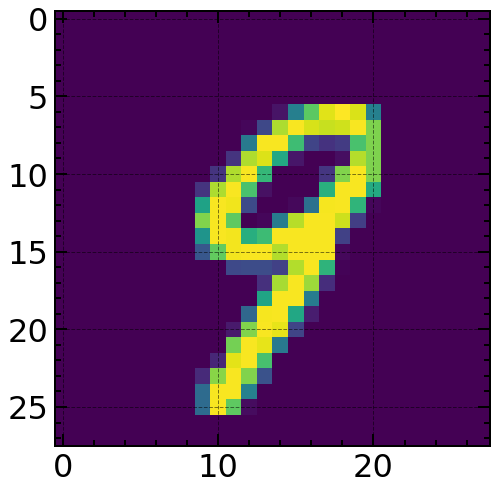

In [5]:
plt.imshow(TRAINING_DATA_ELSE[50000])
plt.show()

In [6]:
def gaussian_kernel(x: np.array, y: np.array) -> np.array:
    delta = x - y
    return np.exp(-0.5 * (delta.T @ delta))

In [7]:
y = np.concatenate((TRAINING_LABELS_ZEROS, TRAINING_LABELS_ELSE))
y = np.outer(y, y)
y

array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

In [24]:
x = np.concatenate((TRAINING_DATA_ZEROS, TRAINING_DATA_ELSE))

plt.show()

In [25]:
total_matrix = []

x1 = np.hstack(x[3])
x2 = np.hstack(x[2])


In [26]:
total_matrix = np.zeros((len(x), len(x)))
total_matrix[0][0] = 1

In [37]:
for i in range(len(x)):
    x1 = np.hstack(x[i])
    for j in range(len(x)):
        x2 = np.hstack(x[j])
        total_matrix[i][j] = gaussian_kernel(x1, x2)

KeyboardInterrupt: 

In [ ]:
for i in range(len(x)):
    row = []
    temp_x = x[i]
    for j in range(len(x)):
        temp_y = x[j]
        row.append(gaussian_kernel(temp_x, temp_y))
    total_matrix.append(row)